In [29]:
from rdkit import Chem
import seaborn
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

In [2]:
import rdkit

In [3]:
rdkit.rdBase.rdkitVersion

'2022.09.4'

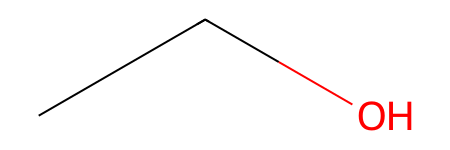

In [4]:
Chem.MolFromSmiles('CCO')

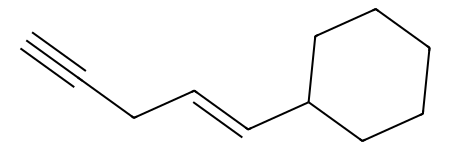

In [5]:
Chem.MolFromSmiles("C#CCC=CC1CCCCC1")

In [6]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
mols = []
count = 0
for mol in supp:
    if mol:
        mols.append(mol)
    else:
        count+=1
print(len(mols), count)

[13:02:24] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:02:24] ERROR: Could not sanitize molecule ending on line 20009
[13:02:24] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:02:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:02:25] ERROR: Could not sanitize molecule ending on line 250947
[13:02:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:02:25] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:02:25] ERROR: Could not sanitize molecule ending on line 258130
[13:02:25] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:02:25] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:02:25] ERROR: Could not sanitize molecule ending on line 261581
[13:02:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:02:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:02:25] ERROR: Coul

[13:02:25] Explicit valence for atom # 19 N, 4, is greater than permitted
[13:02:25] ERROR: Could not sanitize molecule ending on line 636938
[13:02:25] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
[13:02:25] Explicit valence for atom # 0 O, 3, is greater than permitted
[13:02:25] ERROR: Could not sanitize molecule ending on line 640674
[13:02:25] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
[13:02:25] Explicit valence for atom # 4 F, 2, is greater than permitted
[13:02:25] ERROR: Could not sanitize molecule ending on line 645068
[13:02:25] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
[13:02:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:02:26] ERROR: Could not sanitize molecule ending on line 659994
[13:02:26] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:02:26] Explicit valence for atom # 0 Be, 3, is greater than permitted
[13:02:26] ERROR: Could not sanitize molec

7117 63


[13:02:27] Explicit valence for atom # 0 C greater than permitted
[13:02:27] ERROR: Could not sanitize molecule ending on line 1151592
[13:02:27] ERROR: Explicit valence for atom # 0 C greater than permitted


In [7]:
m = mols[1]
type(m)

rdkit.Chem.rdchem.Mol

In [11]:
rings = [len(Chem.GetSSSR(m)) for m in mols]

<Axes: ylabel='Count'>

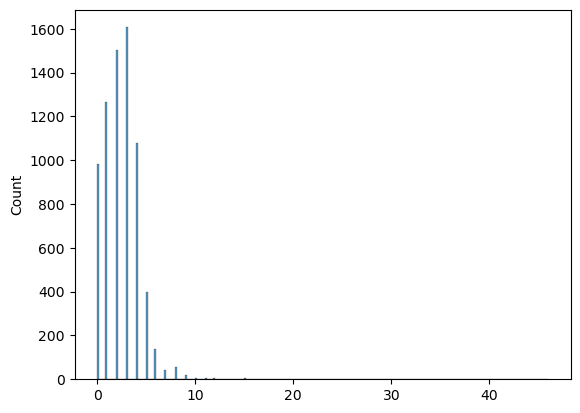

In [12]:
seaborn.histplot(rings)

In [14]:
sum(rings)/len(rings)

2.4701419137276943

In [31]:
labels = ['Mol weight', 'HBA', 'HBD', 'logP']
fs = [Descriptors.MolWt, Descriptors.NumHAcceptors, Descriptors.NumHDonors, Descriptors.MolLogP]
limits = [500, 10, 5, 5]

Mol weight


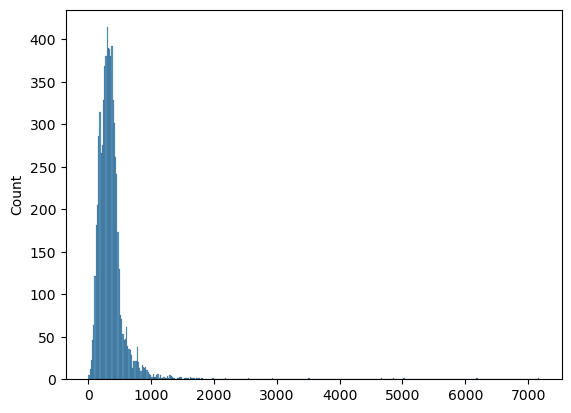

HBA


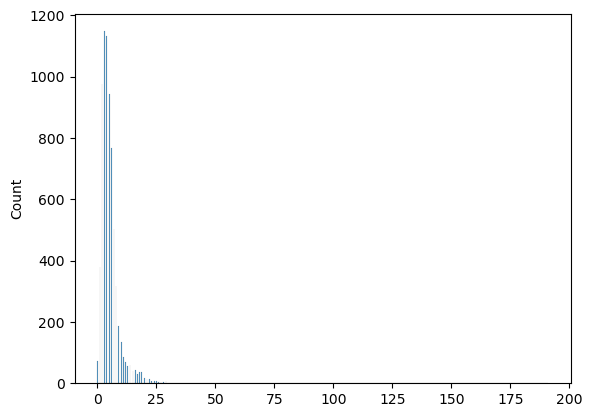

HBD


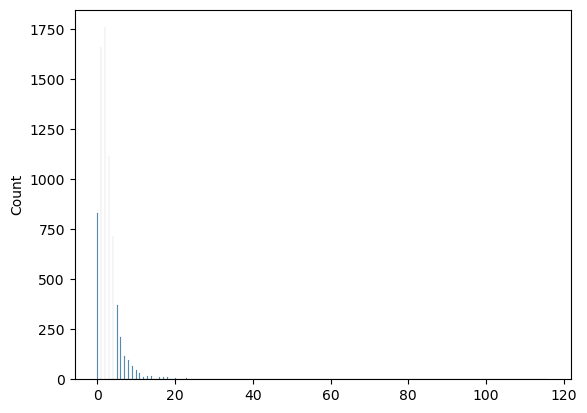

rotatable bonds


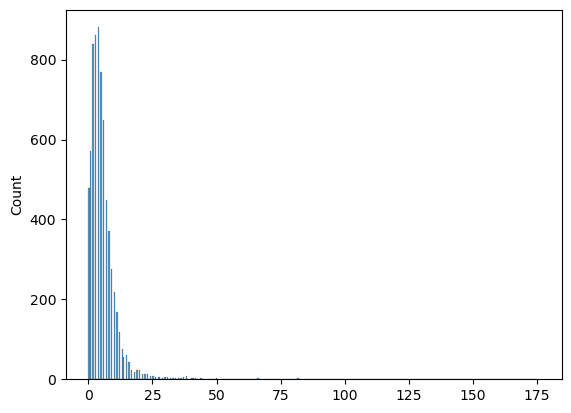

logP


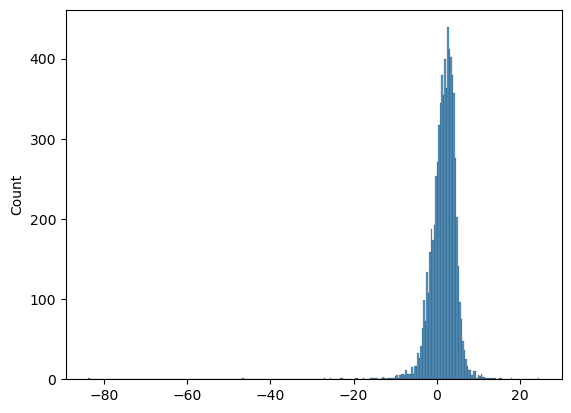

In [30]:
for f,label in zip(fs, labels):
    data = [f(m) for m in mols]
    print(label)
    seaborn.histplot(data)
    plt.show()

In [37]:
def lip(m):
    return [f(m) > l for f,l,lab in zip(fs, limits, labels)]
        
[sum(lip(m)) for m in mols]

[3,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


<Axes: ylabel='Count'>

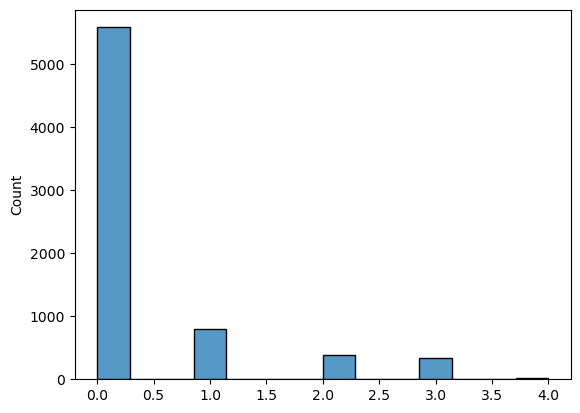

In [38]:
seaborn.histplot([sum(lip(m)) for m in mols])